In [13]:
import phrt_opt
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 12})

### Problem initialization

In [31]:
infos = {}

num_beams = 100
num_measurements = 4 * num_beams

# Transmission matrix
tm = np.random.randn(num_measurements, num_beams) + 1j * np.random.randn(num_measurements, num_beams)

# Solution vector
x = np.random.randn(num_beams, 1) + 1j * np.random.randn(num_beams, 1)

# Measurements vector
b = np.abs(tm.dot(x))

### Basic usage of the algorithm

In [32]:
x_hat = phrt_opt.methods.admm(tm, b, max_iter=500, tol=1e-16)
print(f"Distance to solution: %.3e" % phrt_opt.metrics.projection_norm(x, x_hat))

Distance to solution: 1.145e+00


### Algorithm usage with default $\rho$-strategy

Distance to solution: 1.407e+00


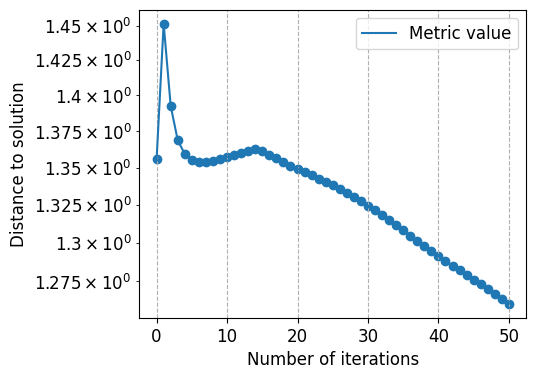

In [33]:
tol = 1e-4
max_iter = 50
metric = phrt_opt.metrics.projection_norm
callbacks = [phrt_opt.callbacks.MetricCallback(x, metric)]

x_hat, info = phrt_opt.methods.admm(
    tm, b,
    tol=tol,
    max_iter=max_iter,
    metric=metric,
    callbacks=callbacks,
)
print(f"Distance to solution: %.3e" % phrt_opt.metrics.projection_norm(x, x_hat))
plt.figure(figsize=(5, 4))
plt.plot(info[:, 0], label="Metric value")
plt.scatter(np.arange(len(info)), info[:, 0])
plt.title("")
plt.xlabel("Number of iterations")
plt.ylabel("Distance to solution")
plt.yscale("log")
plt.legend()
plt.grid(True, linestyle='--')
plt.show()

infos["default_strategy"] = info[:, 0]

### Algorithm usage with default $\rho$-strategy and spectral initializer

Distance to solution: 1.254e-02


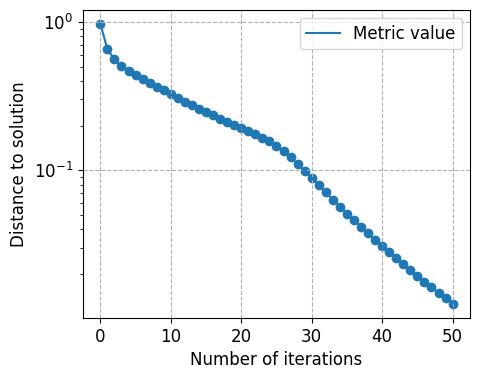

In [34]:
tol = 1e-3
max_iter = 50
metric = phrt_opt.metrics.projection_norm
callbacks = [phrt_opt.callbacks.MetricCallback(x, metric)]

# Initializer definition
initializer = phrt_opt.initializers.GaoXu(eig=phrt_opt.eig.PowerMethod(1e-4))
x_hat, info = phrt_opt.methods.admm(
    tm, b,
    x0=initializer(tm, b),
    tol=tol,
    max_iter=max_iter,
    metric=metric,
    callbacks=callbacks,
)
print(f"Distance to solution: %.3e" % phrt_opt.metrics.projection_norm(x, x_hat))
plt.figure(figsize=(5, 4))
plt.plot(info[:, 0], label="Metric value")
plt.scatter(np.arange(len(info)), info[:, 0])
plt.title("")
plt.xlabel("Number of iterations")
plt.ylabel("Distance to solution")
plt.yscale("log")
plt.legend()
plt.grid(True, linestyle='--')
plt.show()

infos["default_strategy_with_initializer"] = info[:, 0]

### Algorithm usage with adaptive $\rho$-strategy

Distance to solution: 7.402e-03


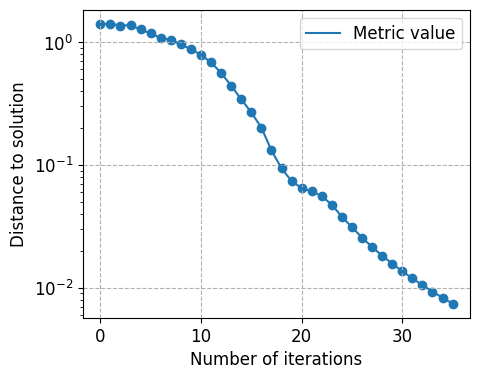

In [35]:
tol = 1e-3
max_iter = 50
metric = phrt_opt.metrics.projection_norm
callbacks = [phrt_opt.callbacks.MetricCallback(x, metric)]

x_hat, info = phrt_opt.methods.admm(
    tm, b,
    tol=tol,
    max_iter=max_iter,
    metric=metric,
    callbacks=callbacks,
    strategy=phrt_opt.strategies.auto(),
)
print(f"Distance to solution: %.3e" % phrt_opt.metrics.projection_norm(x, x_hat))
plt.figure(figsize=(5, 4))
plt.plot(info[:, 0], label="Metric value")
plt.scatter(np.arange(len(info)), info[:, 0])
plt.title("")
plt.xlabel("Number of iterations")
plt.ylabel("Distance to solution")
plt.yscale("log")
plt.legend()
plt.grid(True, linestyle='--')
plt.show()

infos["auto_strategy"] = info[:, 0]

### Algorithm usage with adaptive $\rho$-strategy and spectral initializer

Distance to solution: 5.960e-03


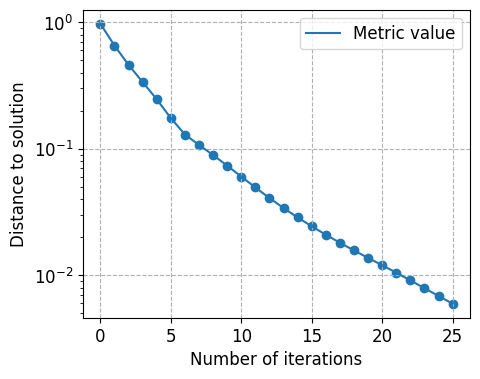

In [36]:
tol = 1e-3
max_iter = 50
metric = phrt_opt.metrics.projection_norm
callbacks = [phrt_opt.callbacks.MetricCallback(x, metric)]

# Initializer definition
initializer = phrt_opt.initializers.GaoXu(eig=phrt_opt.eig.PowerMethod(1e-4))
x_hat, info = phrt_opt.methods.admm(
    tm, b,
    x0=initializer(tm, b),
    tol=tol,
    max_iter=max_iter,
    metric=metric,
    callbacks=callbacks,
    strategy=phrt_opt.strategies.auto(),
)
print(f"Distance to solution: %.3e" % phrt_opt.metrics.projection_norm(x, x_hat))
plt.figure(figsize=(5, 4))
plt.plot(info[:, 0], label="Metric value")
plt.scatter(np.arange(len(info)), info[:, 0])
plt.title("")
plt.xlabel("Number of iterations")
plt.ylabel("Distance to solution")
plt.yscale("log")
plt.legend()
plt.grid(True, linestyle='--')
plt.show()

infos["auto_strategy_with_initializer"] = info[:, 0]

### Final comparison

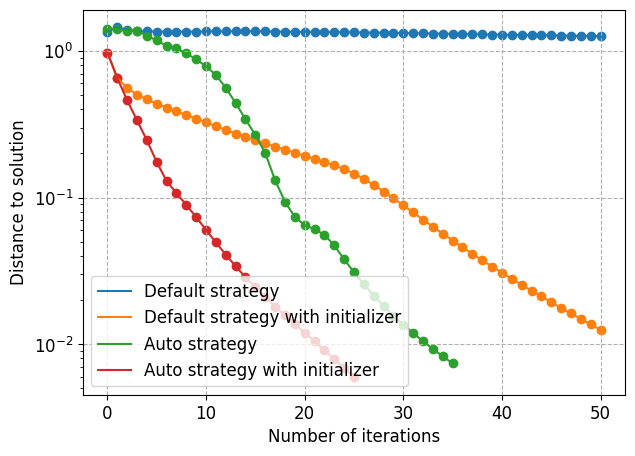

In [37]:
plt.figure(figsize=(7, 5))
plt.plot(infos["default_strategy"], label="Default strategy")
plt.scatter(np.arange(len(infos["default_strategy"])), infos["default_strategy"])

plt.plot(infos["default_strategy_with_initializer"], label="Default strategy with initializer")
plt.scatter(np.arange(len(infos["default_strategy_with_initializer"])), infos["default_strategy_with_initializer"])

plt.plot(infos["auto_strategy"], label="Auto strategy")
plt.scatter(np.arange(len(infos["auto_strategy"])), infos["auto_strategy"])

plt.plot(infos["auto_strategy_with_initializer"], label="Auto strategy with initializer")
plt.scatter(np.arange(len(infos["auto_strategy_with_initializer"])), infos["auto_strategy_with_initializer"])

plt.xlabel("Number of iterations")
plt.ylabel("Distance to solution")
plt.yscale("log")
plt.legend()
plt.grid(True, linestyle='--')
plt.show()